In [124]:
#importer vos librairies 
import pandas as pd 
import numpy as np 
import seaborn as s
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [42]:
df=pd.read_csv(r'C:\Users\u164539\Documents\avocado.csv',sep=',')

In [15]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [16]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [13]:
type(df)

pandas.core.frame.DataFrame

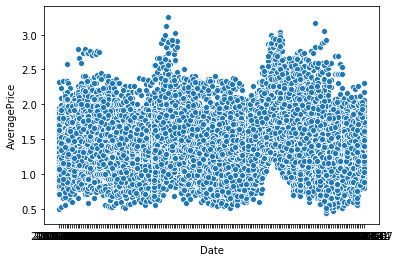

In [21]:
nuage = s.scatterplot(x = 'Date', y = 'AveragePrice', data = df);

In [24]:
df.type

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


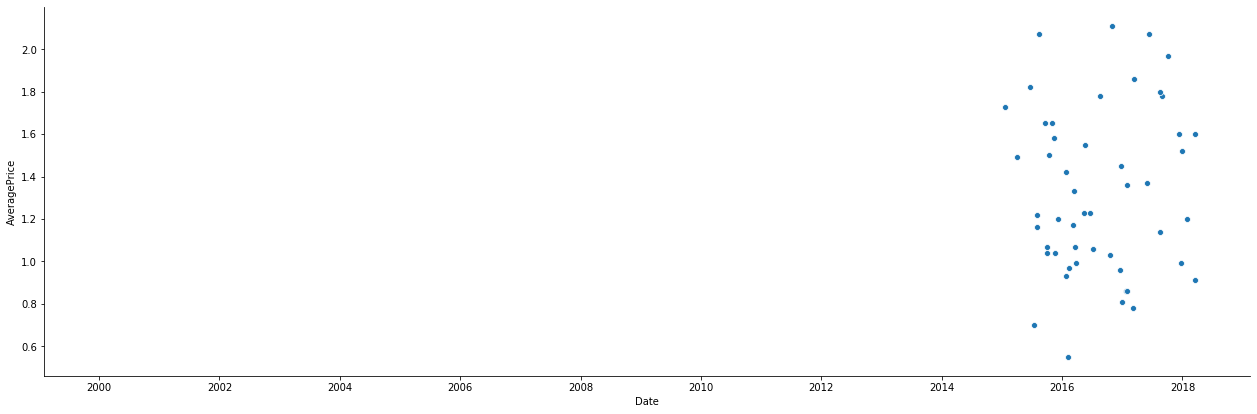

In [31]:
relplot = s.relplot(x = "Date", y = "AveragePrice", data = df.sample(n = 50))
relplot.fig.set_figwidth(20)
relplot.fig.set_figheight(6)

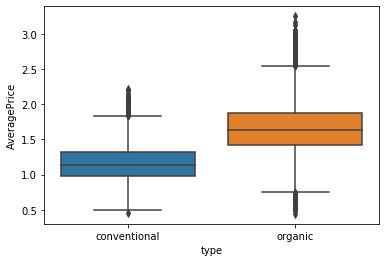

In [35]:
s.boxplot(x = "type", y = "AveragePrice", data = df)

In [ ]:
#les avocat bio sont plus chere ,peut etre le prix ne depend pas que de type peut etre de region et de ville aussi .

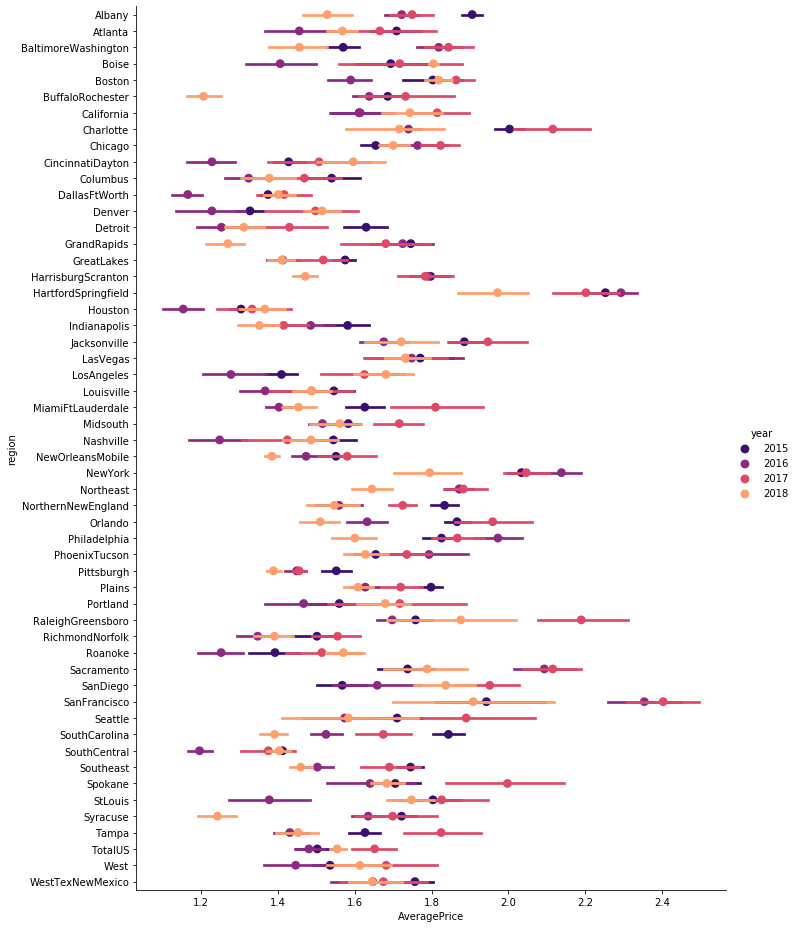

In [38]:
mask = df['type']=='organic'
g = s.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

In [ ]:
#le prix a san fransisco est trop eleve 

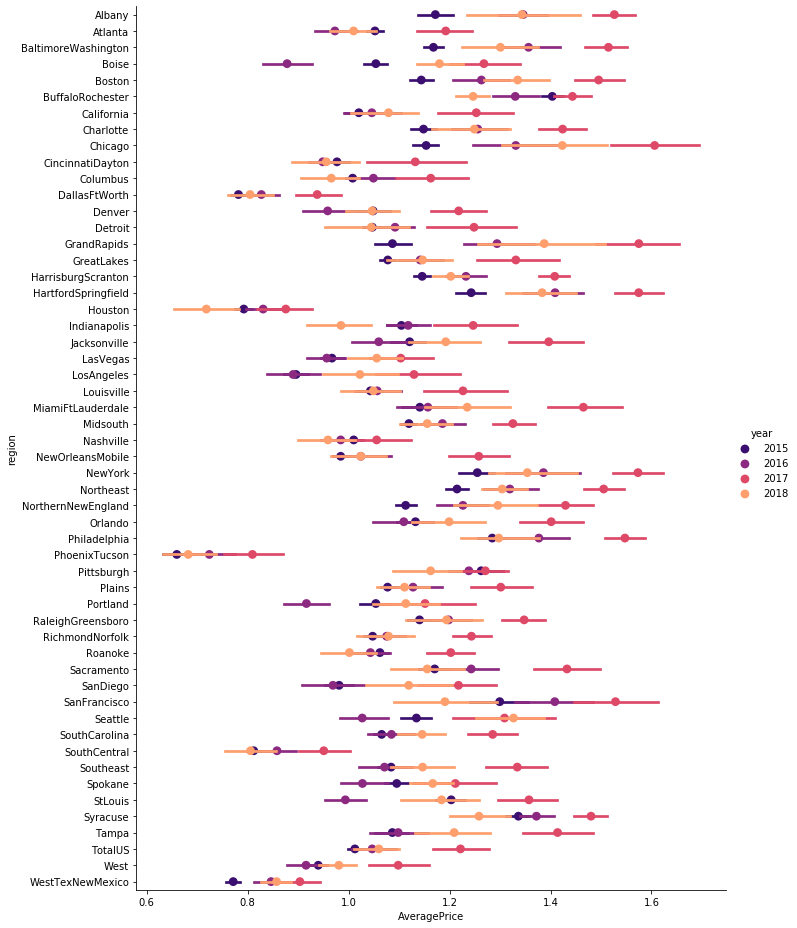

In [39]:
mask = df['type']=='conventional'
g = s.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )


In [ ]:
#Pour des raisons évidentes, les prix sont plus bas.

#Le type d'avocat biologique est plus cher. Et l'avocat est généralement plus cher chaque année. 

In [111]:
label = LabelEncoder()
dicts = {}
label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)

df.type = label.transform(df.type) 


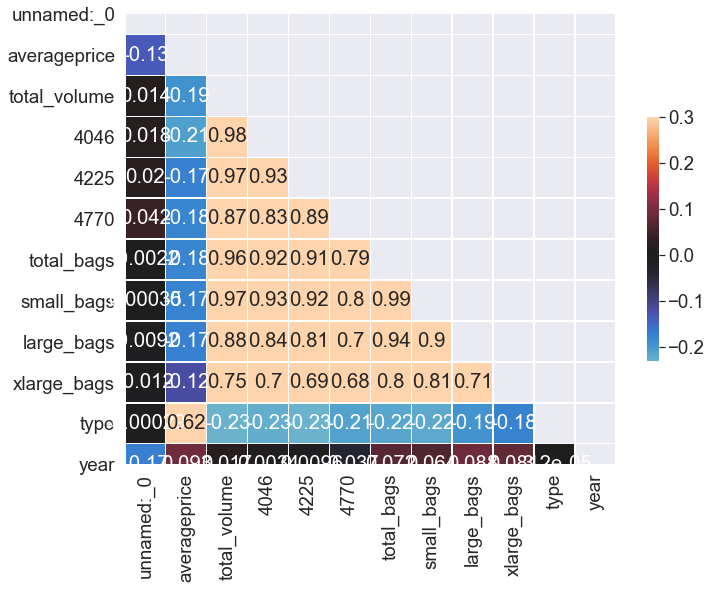

In [110]:
import matplotlib.pyplot as plt

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
s.heatmap(corr, mask = mask, vmax = .3, center = 0, annot = True,
            square = True, linewidths = .5, cbar_kws={"shrink": .5})

In [ ]:
#Le prix de l'avocat est influencé par le type.  je constate également une forte corrélation entre les fonctionnalités: "Total Bags" et "Total Volume".

In [102]:
df.columns=[each.lower() for each in df.columns] 
df.columns=[each.split()[0]+"_"+each.split()[1] if len(each.split())>1 else each for each in df.columns]

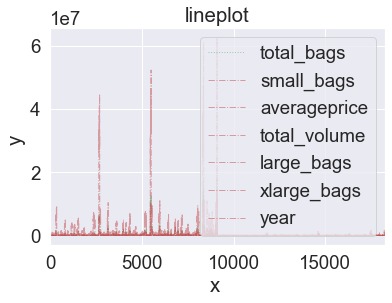

In [103]:
#lineplot
df.total_bags.plot(kind="line", color="g", label="total_bags", linewidth=1, alpha=0.5, grid=True, linestyle=":")
df.small_bags.plot(kind="line", color="r", label="small_bags", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
df.averageprice.plot(kind="line", color="r", label="averageprice", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
df.total_volume.plot(kind="line", color="r", label="total_volume", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
df.large_bags.plot(kind="line", color="r", label="large_bags", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
df.xlarge_bags.plot(kind="line", color="r", label="xlarge_bags", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
df.year.plot(kind="line", color="r", label="year", linewidth=1, alpha=0.5, grid=True, linestyle="-.")
plt.legend(loc="upper right")
plt.xlabel("x ")
plt.ylabel("y ")
plt.title("lineplot")
plt.show()

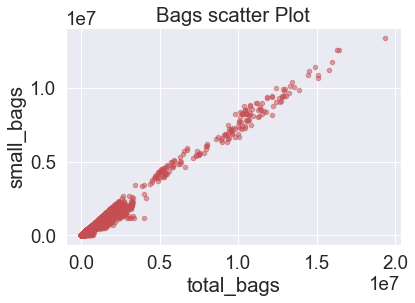

In [78]:
#scatter plot
df.plot(kind="scatter", x="total_bags", y="small_bags", alpha=0.5, color="r")
plt.xlabel("total_bags")
plt.ylabel("small_bags")
plt.title("Bags scatter Plot")
plt.show()

In [115]:
x = df.drop(['type','region','date'], axis = 1)
y = df.type

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [118]:
reg = linear_model.LinearRegression().fit(x_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:

print("Coefficients beta_j :\n{}\nCoefficients INTERCEPT beta0 :\n{}".format(reg.coef_,reg.intercept_))

Coefficients beta_j :
[ 2.28848615e-03  7.65168243e-01  2.83375807e-04 -2.83321856e-04
 -2.83493702e-04 -2.83142667e-04 -8.62444153e-03  8.34103760e-03
  8.34122208e-03  8.33951967e-03 -2.32591011e-02]
Coefficients INTERCEPT beta0 :
46.275827592354894


In [120]:

y_pred = reg.predict(x_test)
y_pred

array([0.54810212, 0.2592709 , 0.45883077, ..., 0.97359866, 0.54549008,
       0.59006429])

In [121]:
r2_score(y_test, y_pred)

0.4109588819247598

In [122]:
#Le R² étant en dessous de 0.70, on peut dire que le pouvoir explicatif est faible.

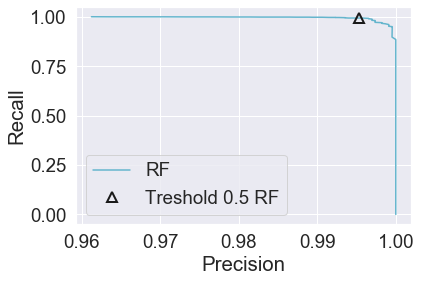

In [125]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])

pl.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
pl.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
pl.xlabel("Precision")
pl.ylabel("Recall")
pl.legend(loc = "best")

In [127]:
from sklearn.metrics import average_precision_score
p_rf = average_precision_score(y_test,rf.predict_proba(x_test)[:,1])
print("Average precision score Random Forest Classifier: {:.3f}".
     format(p_rf))

Average precision score Random Forest Classifier: 1.000


In [128]:
#classifer fonctionne bien